In [71]:
# Paquete Numpy
import numpy as np

# Generación de números pseudoaleatorios
from numpy import random as rd

# Módulo para las gráficas
from matplotlib import pyplot as plt

# Para obtener los valores de la t-student y la normal
from scipy.stats import t
from scipy.stats import norm as z

<h1 style="background-color:Green;font-size:36pt;color:white">MODELOS DE SIMULACIÓN </h1>

## Universidad Tecnológica La Salle - León, Nicaragua
### Giusseppe Benito Bervis Quintero

La mayor parte del contenido teórico de este cuaderno fue tomado de:
https://joanby.github.io/bookdown-estadistica-inferencial/intervalos-de-confianza.html

# Teorema central del límite

Si todas las muestras de un tamaño particular se seleccionan de cualquier población, la distribución muestral de la media se aproxima a una distribución normal; esta mejora con muestras más grandes.

# Intervalos de confianza

Una estimación por intervalos de un parámetro poblacional es una regla para calcular, a partir de una muestra, un intervalo en el que, con una cierta probabilidad (nivel de confianza), se encuentra el valor verdadero del parámetro.

Estas reglas definirán, a su vez, estimadores.

Intervalo de confianza. Dado un parámetro $\theta$, el intervalo $\theta$   es un intervalo de confianza del $(1− \alpha) \cdot 100\%$ para al parámetro $\theta$ cuando $P(A < \theta < B) = 1−\alpha$.
 
El valor $(1 − \alpha ) \cdot 100\%$ (o contiene solo el $1 − \alpha$) recibe el nombre de nivel de confianza.

El valor $\alpha$ recibe el nombre de nivel de significación.

Por defecto, buscaremos intervalos bilaterales tales que la cola de probabilidad sobrante $\alpha$ se reparta por igual a cada lado del intervalo:

$$P(\theta < A) = P(\theta >B) = \frac{\alpha}{2}$$


Por ejemplo, para buscar un intervalo de confianza $\theta$ del  
$95\%$, buscaremos valores $A,B$ de manera que

$$P(\theta < A) = 0.025 \mbox{ y } P(\theta >B)= 0.025$$

## Estructura de los intervalos de confianza

Estimador Puntual $\pm$ Margen de Error 

Los niveles de confianza más usados son 90%, 95% y 99%. 

- Intervalos de confianza para la media poblacional ($\mu$): 

$$𝑋 \pm \mbox{𝑚𝑎𝑟𝑔𝑒𝑛 𝑑𝑒 𝑒𝑟𝑟𝑜𝑟} $$

- Intervalos de confianza para la proporción poblacional ($𝑝$):  
$$\hat{p} \pm \mbox{𝑚𝑎𝑟𝑔𝑒𝑛 𝑑𝑒 𝑒𝑟𝑟𝑜𝑟} $$


## Intervalos de confianza para el parámetro $\mu$ de una población con  $\sigma$ desconocida

**Teorema:** Sea $X \sim N(\mu, \sigma)$. Sea $X_1, X_2, \ldots, X_n$ una muestra aleatoria simple (m.a.s) de $X$, con media $\overline{X}$ y desviación estándar muestral $S_X$. Entonces, la variable aleatoria $t = \frac{\overline{X} - \mu}{S_X / \sqrt{n}}$ sigue una distribución $t$ de Student con $n -1$ grados de libertad, $t_{n-1}$.

Considere la siguiente situación:
- $X$ una v.a. cualquiera con media poblacional $\mu$ desconocida y desvación estándar $\sigma$ desconocida.
- $X_1, X_2, \ldots, X_n$ una m.a.s. de $X$ de tamaño $n$, con media $\overline{X}$ y desviación estándar $S_X$.
- $n$ es grande. ($n \geq 40$) Esto en simulación no es problema.

Para crear un intervalo de confianza de la media poblacional con una desviación estándar desconocida:
1. Suponga que la población muestreada es normal o aproximadamente normal. De acuerdo al teorema central del límite, se sabe que este supuesto puede ser cuestionale en el caso de muestras pequeñas, y es más válida en el de muestras mayores.
2. Estime la desviación estándar de la población $(\sigma)$ con la desviación estándar de la muestra $(S_X)$.
3. Se busca en la tabla de la distribución $t$, el valor de $t_{n-1, \alpha/2}$.
4. El intervalo de confianza correspondiente es:
$${\large \overline{X} \pm t_{n-1, \alpha/2} \frac{S_X}{\sqrt{n}}}$$

**Ejercicio:** El gerente de Inlet Square Mall, cerca de Ft. Myers, Florida, desea estimar la cantidad media que gastan los clientes que visitan el centro comercial. Una muestra de 20 clientes revela las siguientes cantidades.

<table>
  <tr>
    <td>48.16</td>
    <td>42.22</td>
    <td>46.82</td>
    <td>51.45</td>
    <td>23.78</td>
    <td>41.86</td>
    <td>54.86</td>
  <tr>
  <tr>
    <td>37.92</td>
    <td>52.64</td>
    <td>48.59</td>
    <td>50.82</td>
    <td>46.94</td>
    <td>61.83</td>
    <td>61.69</td>
  <tr>
  <tr>
    <td>49.17</td>
    <td>61.46</td>
    <td>51.35</td>
    <td>52.68</td>
    <td>58.84</td>
    <td>43.88</td>
</table>

- ¿Cuál es la estimación de la media poblacional?
- Determine un intervalo de confianza de 95% e interprete el resultado.
- ¿Concluiría de forma razonableque la media poblacional es de 50 o 60 dólares?

In [45]:
# Introduciendo los valores
x = [48.16, 42.22, 46.82, 51.45, 23.78, 41.86, 54.86, 37.92, 
     52.64, 48.59, 50.82, 46.94, 61.83, 61.69, 49.17, 61.46, 
     51.35, 52.68, 58.84, 43.88]

# Calculando la media
X = np.mean(x)

# Calculando la desviación estándar
Sx = np.std(x)

# Calculando el intervalo de confianza
t_n = t.ppf(0.975, 19)
ext_inf = X - t_n * Sx / np.sqrt(20) # Extremo inferior del intervalo
ext_sup = X + t_n * Sx / np.sqrt(20) # Extremo superior del intervalo
print('El intervalo de confianza para la media es:', (ext_inf, ext_sup))

El intervalo de confianza para la media es: (45.236999016810785, 53.45900098318921)


# Comprendiendo los intervalos de confianza

**Ejercicio:** Consideramos una población de $10^6$ valores de una distribución normal con $\mu = 1.5$ y $\sigma = 1$ (estos son los valores teóricos).
- Genere 100 muestras aleatorias simples de tamaño 50 tomados de dicha población. 
- Para cada muestra calcule un intervalo de confianza al 95% de confianza para el parámetro $\mu$.
- Genere una gráfica, donde se visualicen los intervalos de confianza generados. Grafíque en rojo aquellos intervalos que no contengan al valor teórico de la media $(\mu)$.

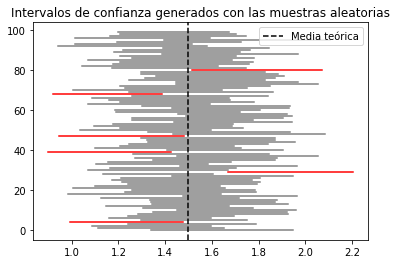

In [63]:
# Generando la población
Poblacion = rd.normal(1.5, 1, 10**6)

# Generando las 100 muestras de tamaño 50
Muestra = rd.choice(Poblacion, size = (100, 50), replace = False)

# Calculando el valor de la t_student
t_n = t.ppf(0.975, 49)

# Calculando los int. de confianza para cada muestra
for i in range(len(Muestra)):
    x = Muestra[i] # Tomando la muestra
    X = np.mean(x) # Media muestral
    Sx = np.std(x) # Varianza muestral
    
    # Calculando los extremos inferior y superior del intervalo
    ext_inf = X - t_n * Sx / np.sqrt(50)
    ext_sup = X + t_n * Sx / np.sqrt(50)
    
    # Si el extremo inferior es mayor que el valor teórito
    # o si el extremo superior es menor que el valor teórico
    # significa que el intervalo no contiene a dicho valor. (Gráficamos en rojo)
    if ext_inf > 1.5 or ext_sup < 1.5:
        plt.plot([ext_inf, ext_sup], [i, i], color = 'r')
    # Caso contrario gráfiquemos en gris
    else:
        plt.plot([ext_inf, ext_sup], [i, i], color = 'grey')

# Graficando el valor teórico
plt.axvline(1.5, color = 'black', linestyle = '--', label = 'Media teórica')
plt.legend()
plt.title('Intervalos de confianza generados con las muestras aleatorias')
plt.show()

**Ejercicio:** Retome el ejemplo de la inversión de la impresora de B $\&$ B. (Donde se guardan los valores en una lista)
- Realice 100,000 simulaciones y cálcule un intervalo con el 99.99% confianza para la utilidad esperada. (Redondee a 2 decimales los resultadosm ya que se trata de dinero.)

In [81]:
CMdO = [43, 44, 45, 46, 47] # Costo de mano de obra
pCMdO = [0.1, 0.2, 0.4, 0.2, 0.1] # Probabilidad del costo de mano de obra

n = 100000 # No. de simulaciones
perdidas = [] # Lista de perdidas
UtT = [] # Lista de las utilidades

for i in range(n):
    c1 = rd.choice(CMdO, p = pCMdO)
    c2 = round(rd.uniform(80, 100), 2)
    x =  np.absolute(round(rd.normal(15000, 4500), 0))

    Ut = (249 - c1 -c2)*x - 1000000
    UtT.append(Ut) # Actualización de la lista de utilidad total

    if Ut <= 0:
        perdidas.append(1)
    else:
        perdidas.append(0)

pPerdidas = np.mean(perdidas) # Probabilidad de perder
dsPerdidas = np.std(perdidas)# Desviación estándar de la probabilidad de perder
#print(f'La probabilidad de perder es {pPerdidas}')

UE = np.mean(UtT) # Utilidad esperada
dsUE = np.std(UtT) 
print(f'La utilidad esperada es {UE}')

t_n = t.ppf(0.9999, n - 1)
r_n = np.sqrt(n)
# Intervalo de confianza para la Utilidad Total
ext_inf_Utilidad = np.round(UE - t_n * dsUE / r_n, 2)
ext_sup_Utilidad = np.round(UE + t_n * dsUE /r_n, 2)
print(f'El intervalo de confianza para la probabilidad de pérdida es: {ext_inf_Utilidad, ext_sup_Utilidad}')

La utilidad esperada es 708914.5915042999
El intervalo de confianza para la probabilidad de pérdida es: (702795.54, 715033.65)


# Intervalos de confianza para la proporción $(p)$

Si se desea construir un intervalo de confianza para la proporción poblacional $(p)$, el intervalo de confianza asociado será:
$$ {\large\hat{p} \pm z_{\alpha / 2} \displaystyle \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}$$

**Ejercicio:** Del ejemplo de B $\&$ B, realizado en la celda anterior.
- Cálcule el intervalo de confianza para la probabilidad de pérdida. (Recuerde que este valor es una proporción. Redondee a 4 decimales los resultados.).

In [82]:
# Calculando los valores de la fórmula
P = pPerdidas 
z_a = z.ppf(0.9999)
raiz = np.sqrt((P*(1-P))/n)

# Intervalo de confianza para la Probabilidad de pérdidas
ext_inf_Perdidas = np.round(P - z_a * raiz, 4)
ext_sup_Perdidas = np.round(P + z_a * raiz, 4)
print(f'El intervalo de confianza para la probabilidad de pérdida es: {ext_inf_Perdidas, ext_sup_Perdidas}')

El intervalo de confianza para la probabilidad de pérdida es: (0.0822, 0.0887)


**Solución:**

**Ejercicio:** Retome el ejemplo de TIBASA, realice 10,000 simulaciones. (Donde se guardan los valores en una lista)
- Determine un intervalo de confianza del 95% para la probabilidad buscada.

In [ ]:
# Para hacer una tabla
print('<table>')

for j in range(0, len(x), 7):
    for i in range(7):
        if j > 13 and i == 6:
            break
        if i == 0:
            print('  <tr>')
        print(f'    <td>{x[j+i]}</td>')
        if i == 6:
            print('  <tr>')
print('</table>')


In [ ]:
CMdO = [43, 44, 45, 46, 47] # Costo de mano de obra
pCMdO = [0.1, 0.2, 0.4, 0.2, 0.1] # Probabilidad del costo de mano de obra

n = 200000 # No. de simulaciones
perdidas = [] # Lista de perdidas
UtT = [] # Lista de las utilidades

for i in range(n):
    c1 = rd.choice(CMdO, p = pCMdO)
    c2 = round(rd.uniform(80, 100), 2)
    x =  np.absolute(round(rd.normal(15000, 4500), 0))

    Ut = (249 - c1 -c2)*x - 1000000
    UtT.append(Ut) # Actualización de la lista de utilidad total

    if Ut <= 0:
        perdidas.append(1)
    else:
        perdidas.append(0)

pPerdidas = np.mean(perdidas) # Probabilidad de perder
dsPerdidas = np.std(perdidas)# Desviación estándar de la probabilidad de perder
print(f'La probabilidad de perder es {pPerdidas}')

UE = np.mean(UtT)
dsUE = np.std(UtT)
print(f'La utilidad esperada es {UE}')

# Intervalo de confianza para la Probabilidad de pérdidas
ext_inf_Perdidas = pPerdidas - t.ppf(1 - 0.05/2, n - 1) * dsPerdidas / np.sqrt(n)
ext_sup_Perdidas = pPerdidas + t.ppf(1 - 0.05/2, n - 1) * dsPerdidas / np.sqrt(n)
print(f'El intervalo de confianza para la probabilidad de pérdida es: {ext_inf_Perdidas, ext_sup_Perdidas}')

# Intervalo de confianza para la Utilidad Total
ext_inf_Utilidad = UE - t.ppf(1 - 0.05/2, n - 1) * dsUE / np.sqrt(n)
ext_sup_Utilidad = UE + t.ppf(1 - 0.05/2, n - 1) * dsUE / np.sqrt(n)
print(f'El intervalo de confianza para la probabilidad de pérdida es: {ext_inf_Utilidad, ext_sup_Utilidad}')